In [132]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

[[ 2.   4. ]
 [ 1.7  2.8]
 [ 7.   8. ]
 [ 8.6  8. ]
 [ 3.4  1.5]
 [ 9.  11. ]]


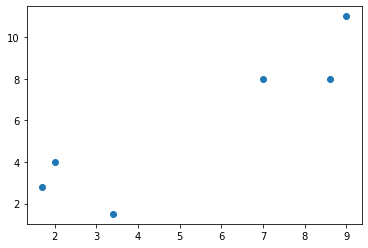

In [133]:
X = np.array(
    [[2, 4],
     [1.7, 2.8],
     [7, 8],
     [8.6, 8],
     [3.4, 1.5],
     [9, 11]]
)
print(X)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [134]:
# Euclidean distance between 2 points.
def euclidean_distance(point1, point2):
    distance = math.sqrt((point2[0] - point1[0]) ** 2 + (point2[1] - point1[1]) ** 2)
    return abs(distance)

In [135]:
# Assign clusters based on centroids passed. It returns a dictionary of cluster and its associated points
def assign_clusters(X, centroids):
    clusters_map = {}
    for point in X:
        distance_points_centroids = []
        for centroid in centroids:
            distance_points_centroids.append(euclidean_distance(centroid, point))
        # Returns the index of the smallest arg which here is the cluster.
        clusters_map.setdefault(np.argmin(distance_points_centroids), []).append(point)
    return clusters_map

In [136]:
# Update the centroid value based on average distance between points.
def update_centroid(clusters_map, number_clusters):
    new_centroids = []
    for c in range(number_clusters):
        # Calulate the mean point based on points assigned to that cluster
        cluster_mean = np.average(clusters_map[c], axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

In [137]:
# Utility function to stop the iteration if the assignment does not change.
def compare_exact(first, second):
    if first.keys() != second.keys():
        return False
    return all(np.array_equal(first[key], second[key]) for key in first)

In [138]:
centroids = 10 * np.random.random((2, 2))
print("Initial centroid {}".format(centroids))
cluster_previous = {}
for i in range(10):
    print("-------------------------Iteration {} ---------------------------".format(i))
    clusters = assign_clusters(X, centroids)
    if compare_exact(cluster_previous, clusters):
        print("Clusters are same as before, so exiting")
        break
    cluster_previous = clusters
    centroids = update_centroid(clusters, 2)
    print("updated centroid {}".format(centroids))
    for key in clusters:
        print("cluster[{}] - {}".format(key, clusters[key]))
    print("-----------------------------------------------------")

Initial centroid [[2.34092737 4.9508841 ]
 [4.83174042 2.75945251]]
-------------------------Iteration 0 ---------------------------
updated centroid [array([4.925, 6.45 ]), array([6.  , 4.75])]
cluster[0] - [array([2., 4.]), array([1.7, 2.8]), array([7., 8.]), array([ 9., 11.])]
cluster[1] - [array([8.6, 8. ]), array([3.4, 1.5])]
-----------------------------------------------------
-------------------------Iteration 1 ---------------------------
updated centroid [array([6.65, 7.75]), array([2.55, 2.15])]
cluster[0] - [array([2., 4.]), array([7., 8.]), array([8.6, 8. ]), array([ 9., 11.])]
cluster[1] - [array([1.7, 2.8]), array([3.4, 1.5])]
-----------------------------------------------------
-------------------------Iteration 2 ---------------------------
updated centroid [array([8.2, 9. ]), array([2.36666667, 2.76666667])]
cluster[1] - [array([2., 4.]), array([1.7, 2.8]), array([3.4, 1.5])]
cluster[0] - [array([7., 8.]), array([8.6, 8. ]), array([ 9., 11.])]
-----------------------

In [139]:
# Create a dataframe from clusters for easy manipulation of data.
df = pd.DataFrame([(key, var) for (key, L) in clusters.items() for var in L], columns=['label', 'point'])
labels = df['label'].unique().tolist()

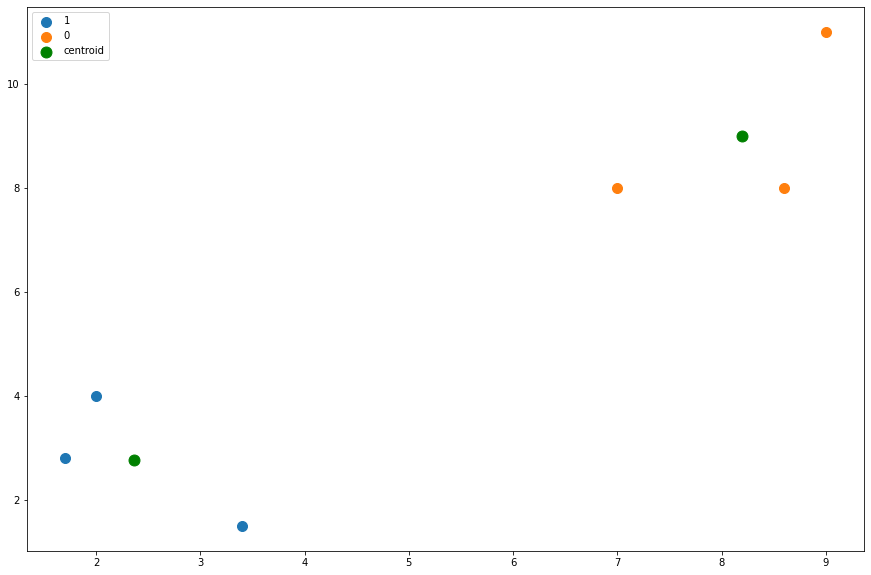

In [140]:
plt.figure(figsize=(15, 10))
for i in labels:
    # filter the points by clusters
    points = df[df['label'] == i]['point'].values
    # Use zip operation to unpack the points
    plt.scatter(*zip(*points), s=100, label=i)
plt.scatter(*zip(*centroids), s=120, color='g', label='centroid')
plt.legend()
plt.show()